# Proyek Predictive Analytics - Taxi Pricing

# Data Understanding

## Data Loading
Pada tahap ini, dataset dimuat menggunakan library pandas. Dataset yang digunakan adalah taxi_trip_pricing.csv.

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


- Ada 1000 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 11 kolom yaitu: Trip_Distance_km,	Time_of_Day,	Day_of_Week,	Passenger_Count,	Traffic_Conditions,	Weather,	Base_Fare,	Per_Km_Rate,	Per_Minute_Rate,	Trip_Duration_Minutes,	Trip_Price.

## Exploratory Data Analysis - Deskripsi Variabel
Fungsi info() digunakan untuk mendapatkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null.

In [40]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


- Terdapat 4 kolom dengan tipe object, yaitu: Time_of_Day,  Day_of_Week, Weather, Base_Fare. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 7 kolom numerik dengan tipe data float64 yaitu: Trip_Distance_km, Passenger_Count, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Trip_Duration_Minutes, Trip_Price.
- Terdapat 1 kolom yang memiliki tipe data tidak sesuai yaitu: Passenger_Count.

### Mengubah Tipe Data yang Tidak Sesuai
Kolom Passenger_Count harus diubah dari float64 menjadi int64 karena jumlah penumpang adalah bilangan bulat. Namun, kolom Passenger_Count mengandung nilai yang tidak dapat dikonversi menjadi integer, seperti NaN (nilai yang hilang) atau infinit. Maka, perlu menangani nilai yang hilang terlebih dahulu sebelum mengonversinya ke tipe int64.

In [41]:
# Imputasi nilai NaN pada 'Passenger_Count' dengan modus (nilai yang paling sering muncul)
df['Passenger_Count'] = df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0])

In [42]:
# Mengonversi kolom 'Passenger_Count' ke tipe integer
df['Passenger_Count'] = df['Passenger_Count'].astype('int64')

In [43]:
# Memeriksa tipe data setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        1000 non-null   int64  
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


Fungsi describe() memberikan statistik deskriptif seperti mean, std, min, max, dan kuartil untuk setiap kolom numerik.

In [44]:
# Display descriptive statistics
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,1000.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.503000,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.080351,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,2.000000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,3.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


## Exploratory Data Analysis - Menangani Missing Value dan Outliers

### Menangani Missing Value

Kita memeriksa missing value dengan isnull().sum()

In [45]:
# Check for missing values
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,0
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


Untuk Atribut Kategorikal:

- Time_of_Day: Menggunakan modus (nilai yang paling sering muncul) berdasarkan pola waktu yang umum
- Day_of_Week: Menggunakan modus karena ini adalah data kategorikal dengan nilai tetap
- Traffic_Conditions: Menggunakan modus kondisi lalu lintas pada Time_of_Day yang sama
- Weather: Menggunakan modus cuaca pada hari dan waktu yang sama

In [46]:
# Mengimputasi missing value pada kolom kategorikal

df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0])
df['Weather'] = df.groupby('Day_of_Week')['Weather'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Normal'))
df['Traffic_Conditions'] = df.groupby('Time_of_Day')['Traffic_Conditions'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Normal')
    )

Untuk Atribut Numerik:

- Trip_Distance_km: Menggunakan median untuk imputasi karena jarak perjalanan biasanya memiliki distribusi yang skewed
- Passenger_Count: Menggunakan modus karena ini adalah data diskrit dengan nilai yang terbatas
- Base_Fare, Per_Km_Rate, Per_Minute_Rate: Menggunakan median untuk menghindari pengaruh outlier
- Trip_Duration_Minutes: Menggunakan median karena durasi perjalanan juga cenderung memiliki distribusi yang skewed
- Trip_Price: Dihitung ulang berdasarkan Base_Fare + (Per_Km_Rate × Trip_Distance_km) + (Per_Minute_Rate × Trip_Duration_Minutes)

In [47]:
# Mengimputasi missing value pada kolom numerikal
df['Passenger_Count'] = df['Passenger_Count'].fillna(df['Passenger_Count'].mode()[0])
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median())
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median())
numeric_cols = ['Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate']
for col in numeric_cols:
  df[col] = df[col].fillna(df[col].median())
price_missing_mask = df['Trip_Price'].isna()
df.loc[price_missing_mask, 'Trip_Price'] = (df.loc[price_missing_mask, 'Base_Fare'] +
 (df.loc[price_missing_mask, 'Per_Km_Rate'] * df.loc[price_missing_mask, 'Trip_Distance_km']) +
  (df.loc[price_missing_mask, 'Per_Minute_Rate'] * df.loc[price_missing_mask, 'Trip_Duration_Minutes']))

In [48]:
# Memeriksa apakah ada nilai hilang setelah imputasi atau penghapusan
df.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


### Duplicate Row

In [49]:
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


### Menangani Outliers

Outliers dapat dideteksi menggunakan boxplot dari library seaborn.

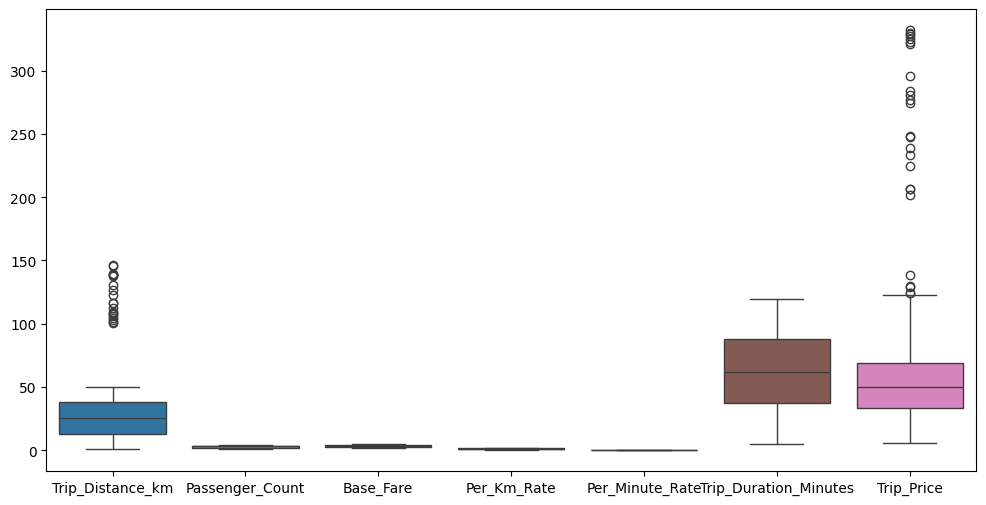

In [50]:
# Check for outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.show()

In [51]:
df.shape

(1000, 11)

Pada beberapa fitur numerik di atas terdapat outliers. Outliers tersebut akan diatasi dengan mengganti outlier dengan nilai batas.

In [52]:
df_numerik = df.select_dtypes(include=['number'])

Q1 = df_numerik.quantile(0.25)
Q3 = df_numerik.quantile(0.75)
IQR=Q3-Q1
df=df[~((df_numerik<(Q1-1.5*IQR))|(df_numerik>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

(975, 11)

## Exploratory Data Analysis - Univariate Analysis

Analisis univariate dilakukan untuk memahami distribusi data pada setiap kolom.

In [53]:
# membagi fitur pada dataset

numerical_features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
                      'Trip_Price']
categorical_features = ['Time_of_Day',  'Day_of_Week', 'Weather', 'Base_Fare']

### Categorical Features

             jumlah sampel  persentase
Time_of_Day                           
Afternoon              409        41.9
Morning                276        28.3
Evening                199        20.4
Night                   91         9.3


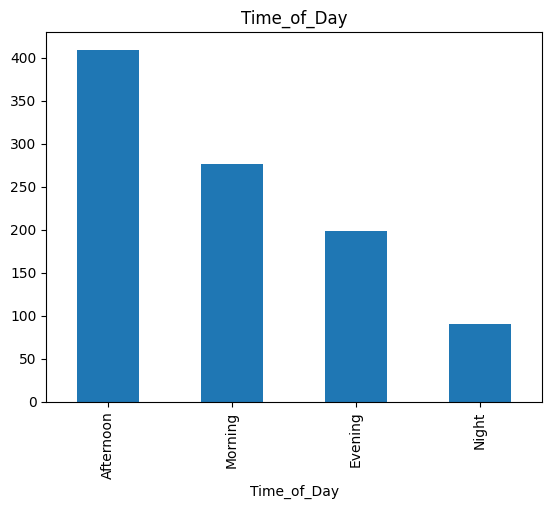

In [54]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_category)
count.plot(kind='bar', title=feature);

Data menunjukkan bahwa waktu sore (Afternoon) lebih dominan dibandingkan waktu lainnya. Ini bisa menunjukkan bahwa sebagian besar aktivitas perjalanan taxi terjadi pada sore hari.

             jumlah sampel  persentase
Day_of_Week                           
Weekday                685        70.3
Weekend                290        29.7


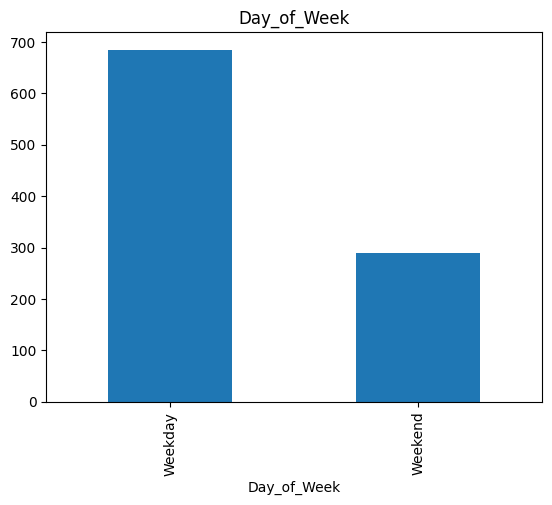

In [55]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_category)
count.plot(kind='bar', title=feature);

Dapat disimpulkan sangat jarang terdapat penumpang yang menggunakan taxi pada saat weekend, yang mana hanya sekitar 29,7 %

         jumlah sampel  persentase
Weather                           
Clear              702        72.0
Rain               220        22.6
Snow                53         5.4


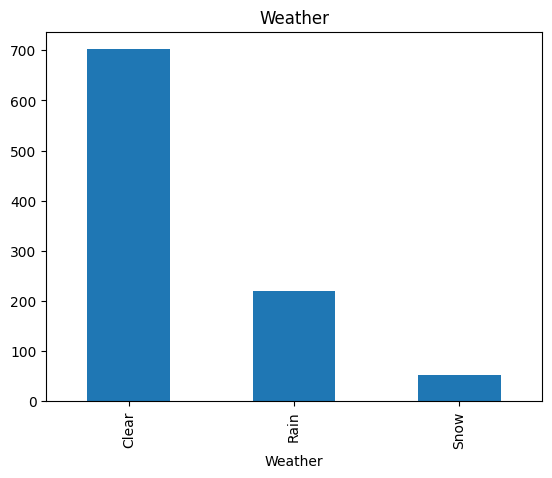

In [56]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_category)
count.plot(kind='bar', title=feature);

Hampir tidak ada yang menggunakan taxi saat salju (snow), sebagian besar memilih cuaca yang terang.

### Numerical Features

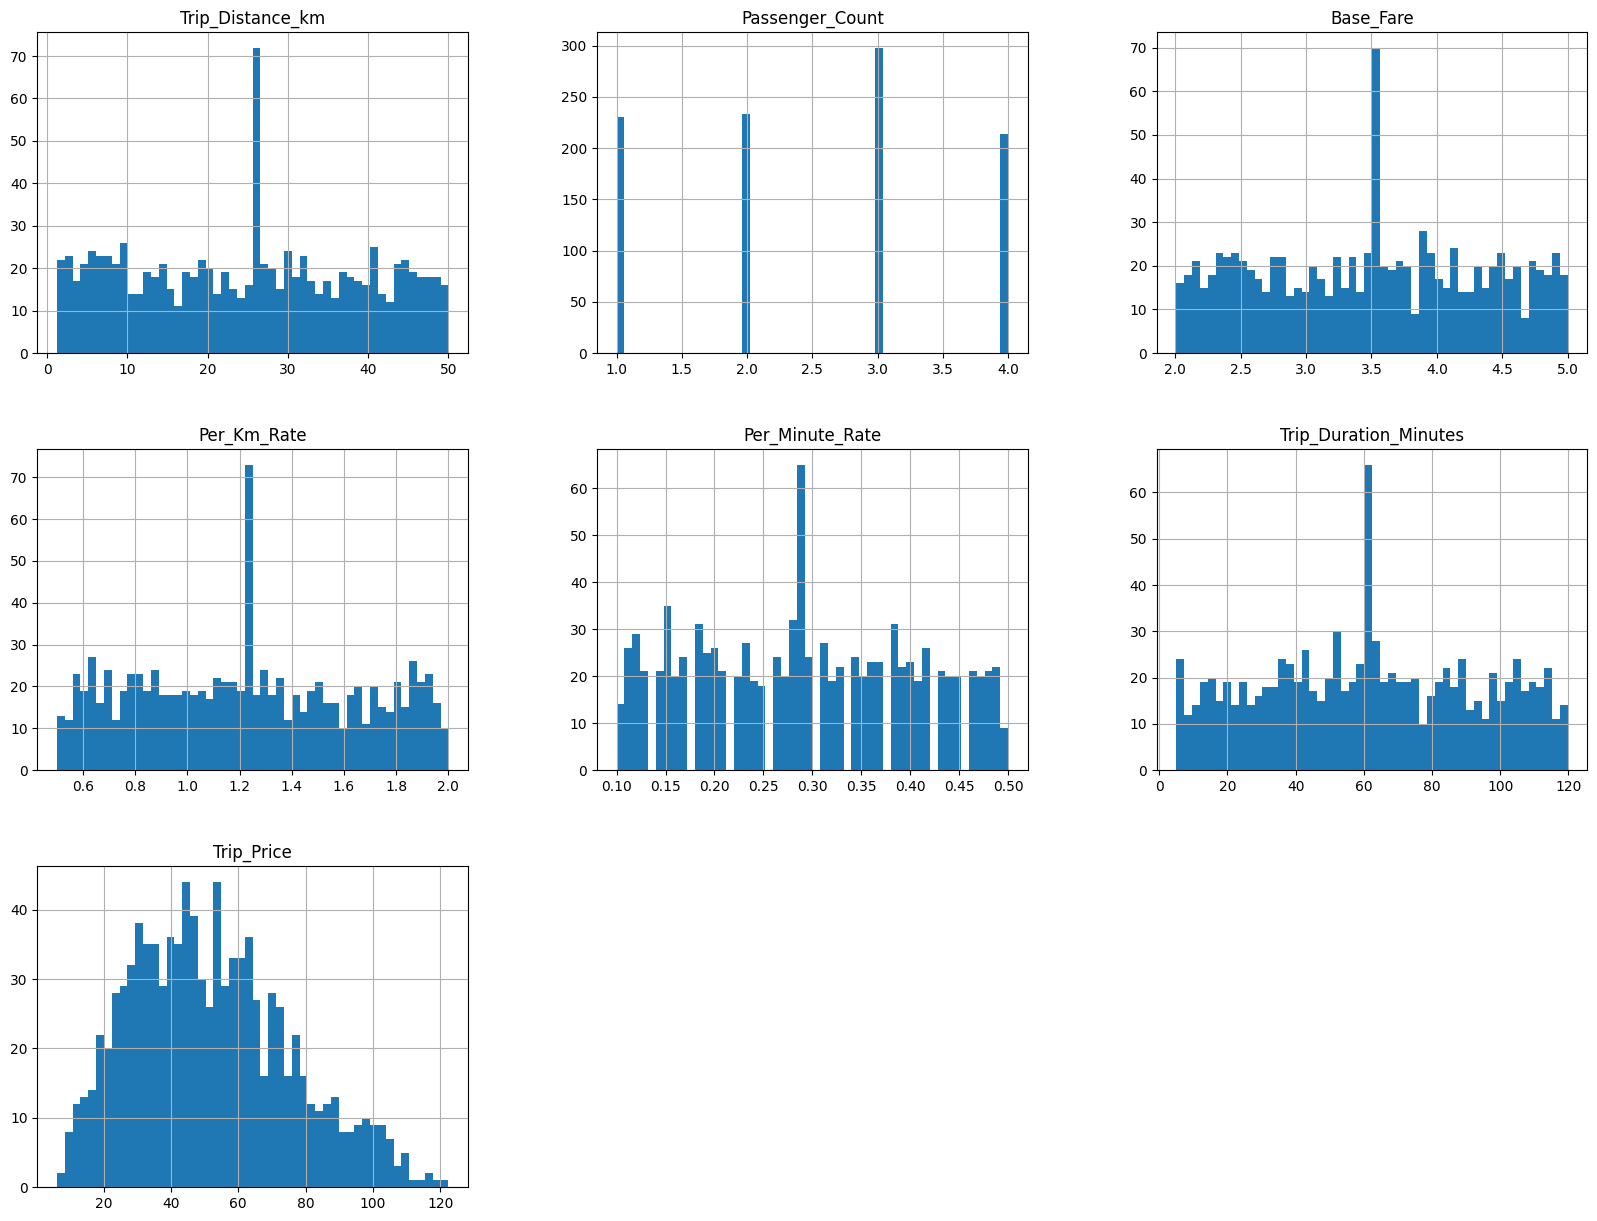

In [57]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- Mayoritas perjalanan taxi memiliki jarak antara 0-20 km
- Jumlah penumpang relatif merata di antara nilai 1 hingga 4 penumpang.
- Tarif dasar mayoritas berkisar antara 2.0-5.0
- Harga perjalanan membentuk distribusi normal dengan sedikit right-skewed

## Exploratory Data Analysis - Multivariate Analysis

### Categorical Features

Mengecek rata-rata Trip_Price terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap Trip_Price.

<ipython-input-58-0891e88b1671>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-58-0891e88b1671>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-58-0891e88b1671>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-i

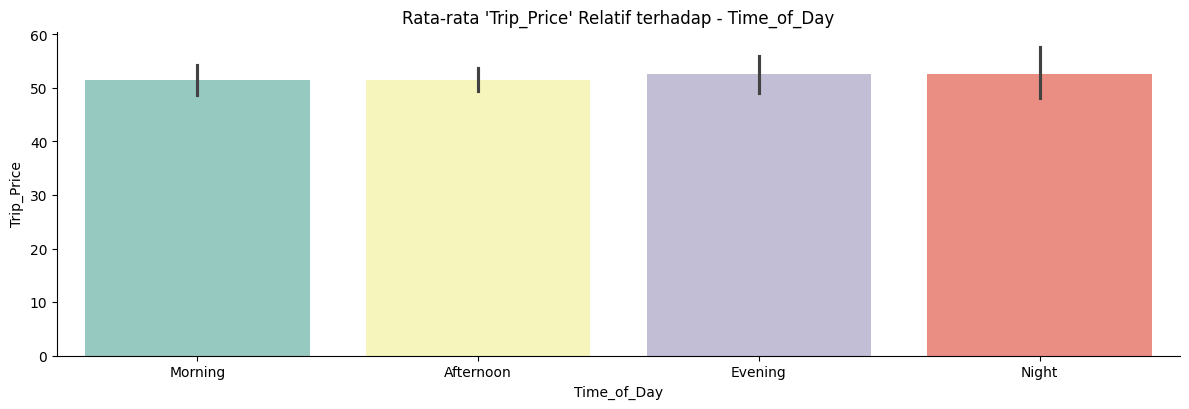

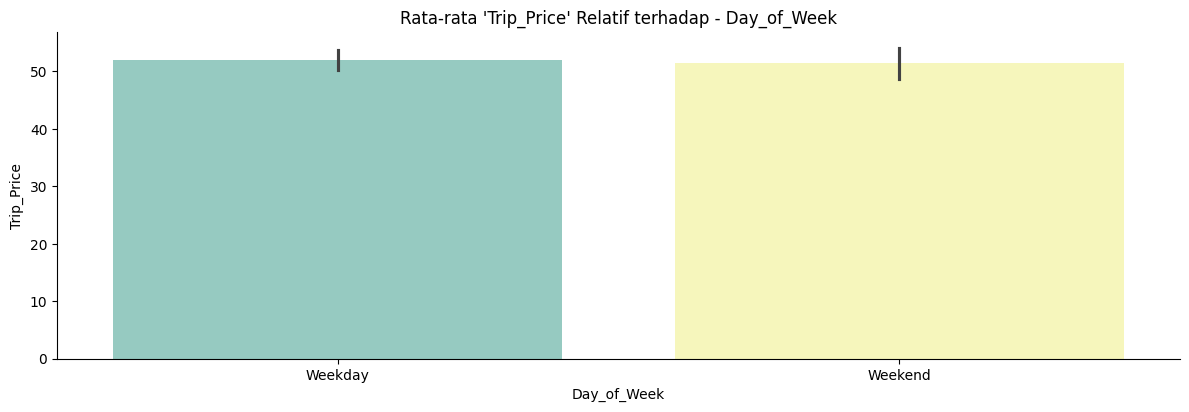

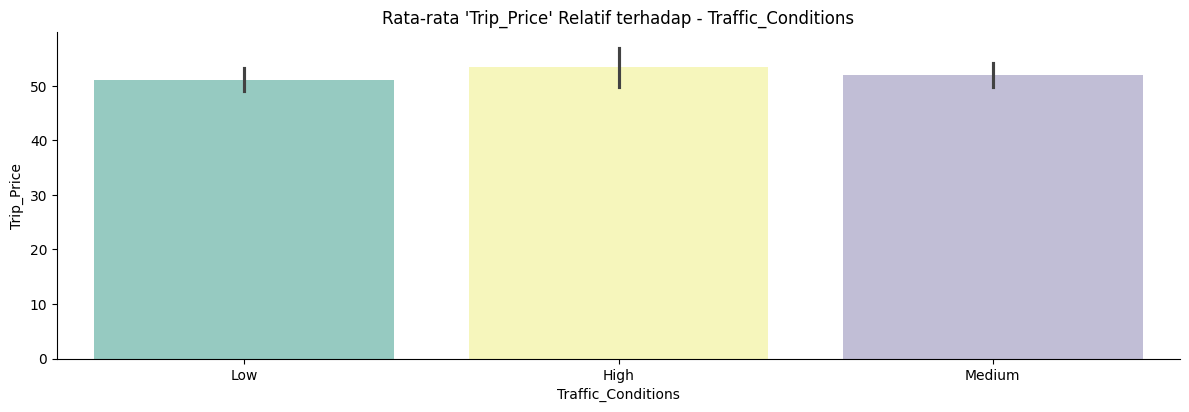

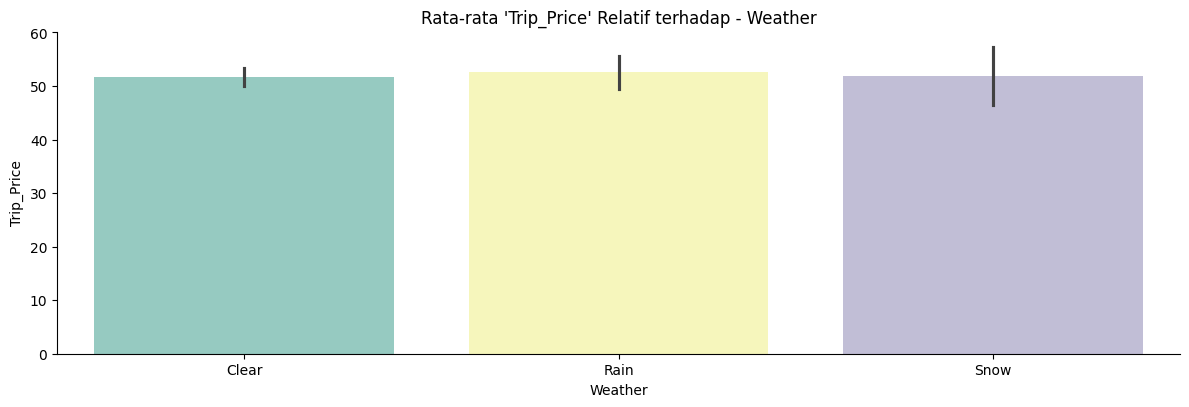

In [58]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Trip_Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Trip_Price' Relatif terhadap - {}".format(col))

Berdasarkan Time of Day (Waktu):


- Harga perjalanan cenderung konsisten di semua waktu (morning, afternoon, evening, night)
- Rata-rata harga berkisar antara 50-52
- Variasi harga antar waktu sangat kecil, menunjukkan tidak ada perbedaan tarif signifikan berdasarkan waktu
- Ini bisa menjadi indikasi bahwa perusahaan taxi tidak menerapkan surge pricing berdasarkan waktu


Berdasarkan Day of Week (Hari):


- Terdapat dua kategori: Weekday dan Weekend
- Rata-rata harga di weekday dan weekend hampir sama (sekitar 50-52)
- Tidak ada perbedaan pricing yang signifikan antara hari kerja dan akhir pekan
- Menunjukkan kebijakan harga yang konsisten sepanjang minggu


Berdasarkan Traffic Conditions (Kondisi Lalu Lintas):


- Tiga kategori: Low, Medium, High
- Rata-rata harga relatif sama untuk semua kondisi lalu lintas (sekitar 50-52)
- Kondisi lalu lintas tidak mempengaruhi harga secara signifikan
- Ini menunjukkan bahwa tarif lebih didasarkan pada jarak dan waktu daripada kondisi lalu lintas


Berdasarkan Weather (Cuaca):


- Tiga kondisi cuaca: Clear, Rain, Snow
- Rata-rata harga konsisten di sekitar 50-52 untuk semua kondisi cuaca
- Tidak ada premium pricing untuk kondisi cuaca buruk
- Menunjukkan kebijakan harga yang fair tanpa mengambil keuntungan dari kondisi cuaca

### Numerical Features
Mengamati hubungan antara fitur numerik menggunakan fungsi pairplot() dan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

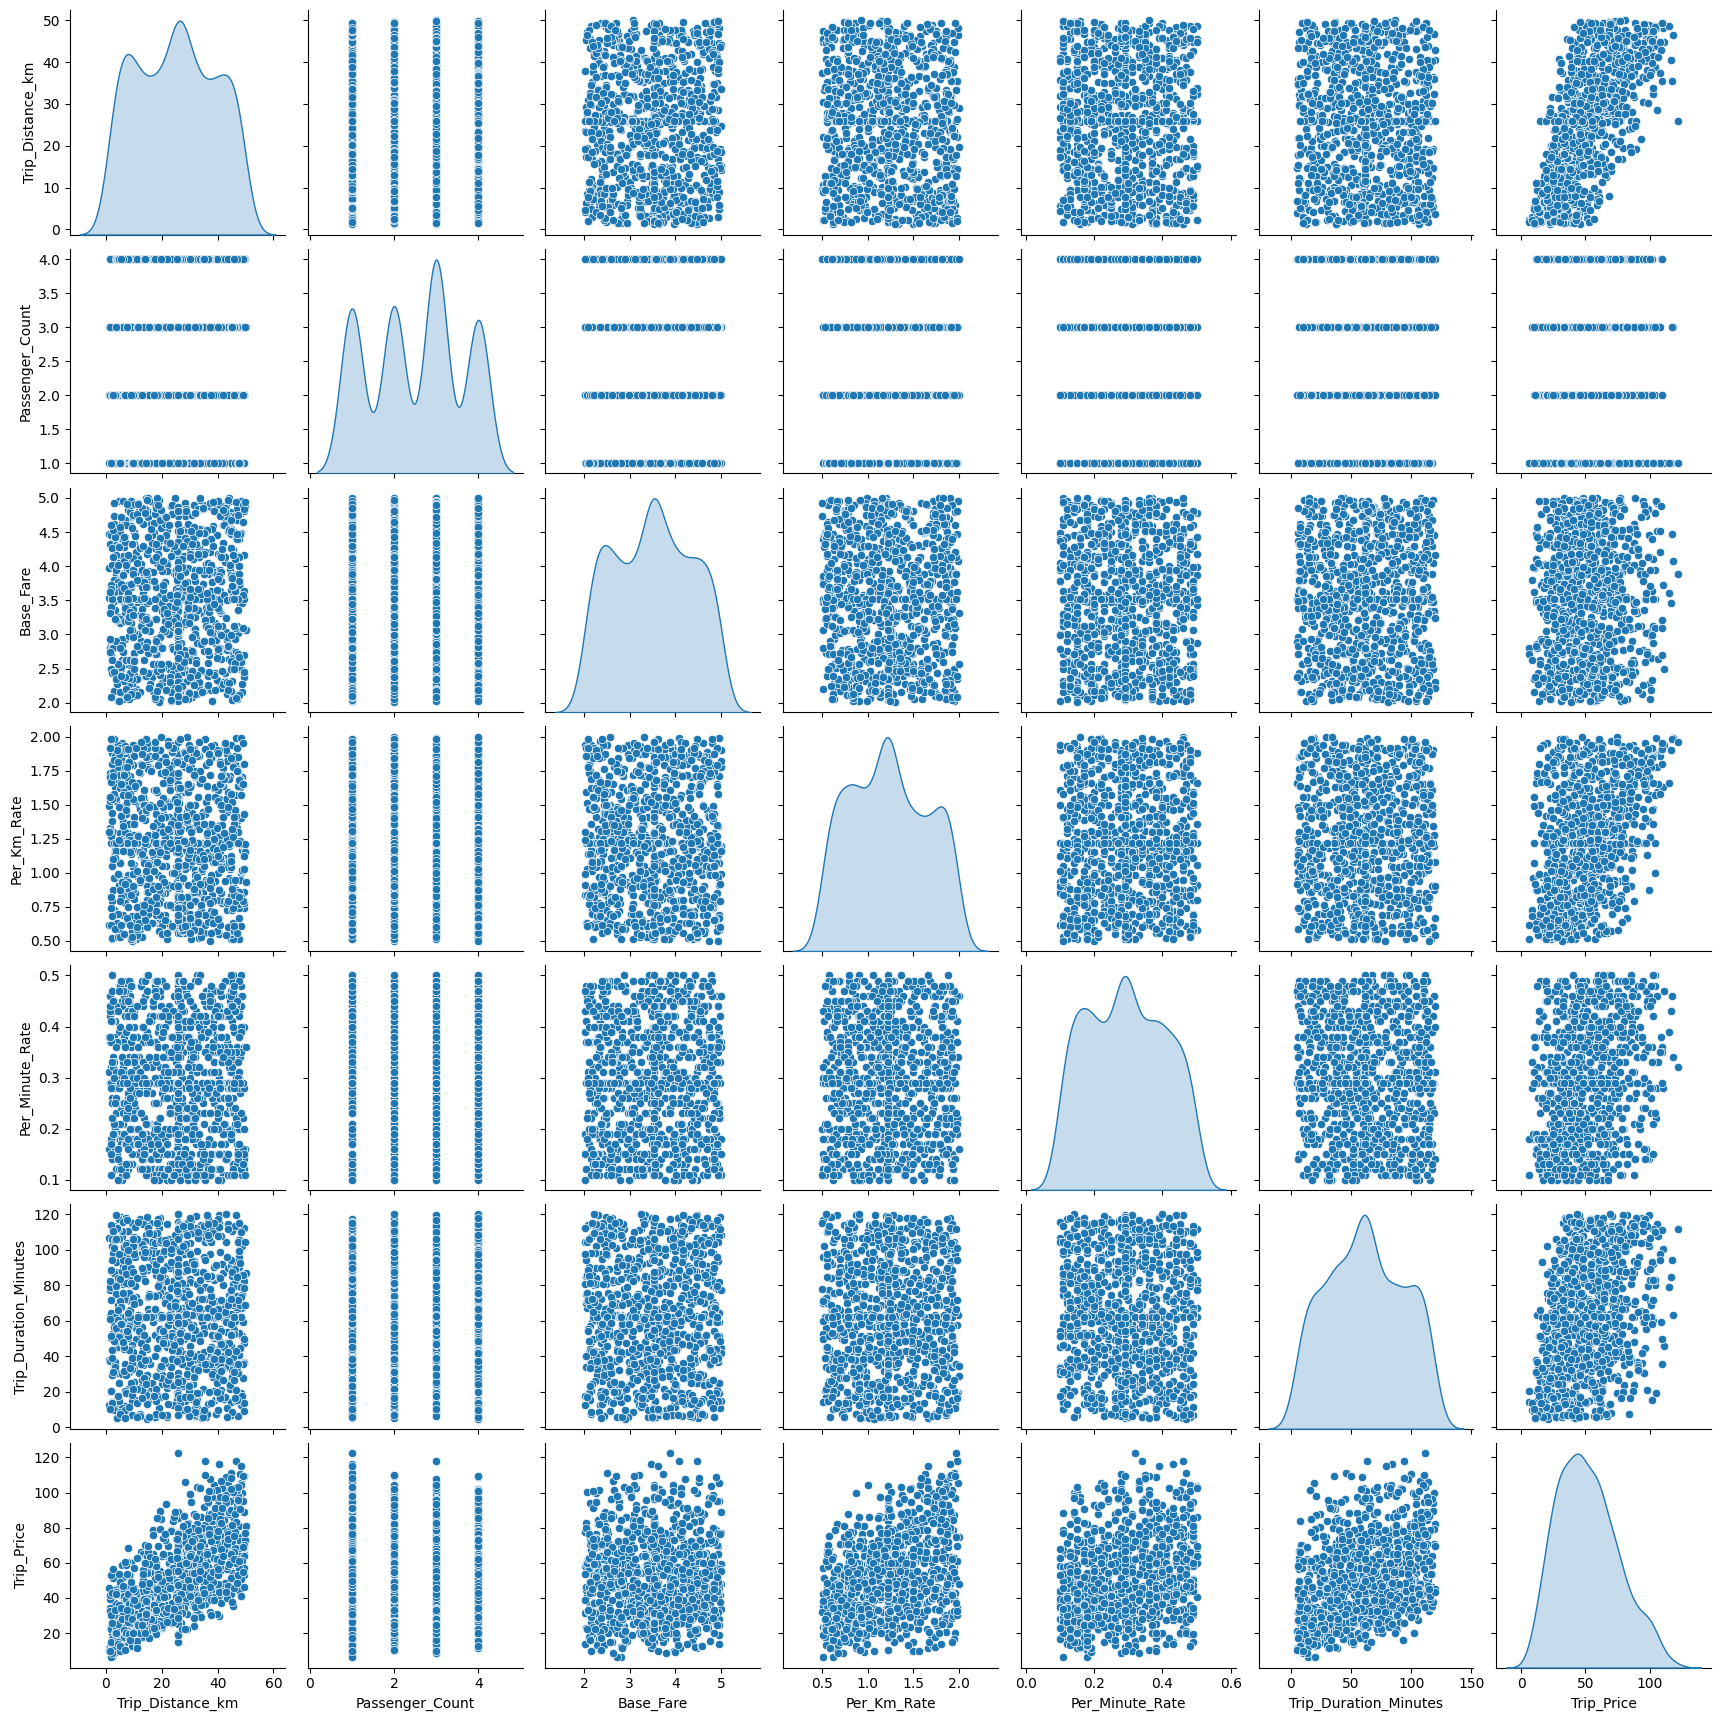

In [59]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot, terlihat ‘Trip_Distance_km’, ‘Per_Km_Rate’, ‘Per_Minute_Rate’, dan ‘Trip_Duration_Minutes’ memiliki korelasi yang tinggi dengan fitur "Trip_Price". Sedangkan kedua fitur lainnya yaitu 'Passenger_Count' dan 'Base_Fare' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

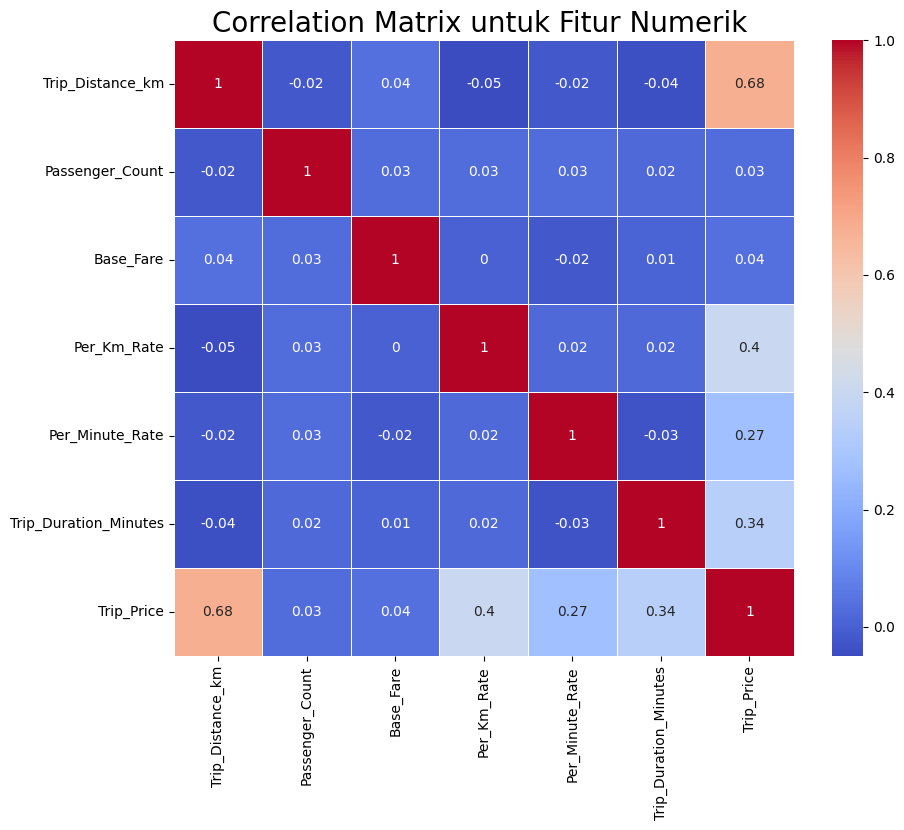

In [60]:
# Mengamati hubungan antar fitur numerik dengan fungsi corr()
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

'Trip_Distance_km' memiliki korelasi positif yang kuat (0.68), sedangkan 'Passenger_Count' dan 'Base_Fare' memiliki korelasi yang sangat lemah. Sehingga, kedua fitur tersebut dapat di-drop

In [61]:
df.drop(['Passenger_Count', 'Base_Fare'], inplace=True, axis=1)
df.head()

<ipython-input-61-5b57562b7e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Passenger_Count', 'Base_Fare'], inplace=True, axis=1)


,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,Low,Clear,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,High,Clear,0.62,0.43,40.57,50.4709
2,36.87,Evening,Weekend,High,Clear,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,Low,Clear,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,High,Clear,0.63,0.32,22.64,15.6180


# Data Preparation

## Encoding Fitur Kategori
Fitur kategorikal diubah menjadi bentuk numerik menggunakan one-hot encoding

In [62]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Time_of_Day'], prefix='Time_of_Day')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Day_of_Week'], prefix='Day_of_Week')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Traffic_Conditions'], prefix='Traffic_Conditions')],axis=1)
df = pd.concat([df, pd.get_dummies(df['Weather'], prefix='Weather')],axis=1)
df.drop(['Time_of_Day','Day_of_Week','Traffic_Conditions', 'Weather'], axis=1, inplace=True)
df.head()

,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,0.80,0.32,53.82,36.2624,False,False,True,False,True,False,False,True,False,True,False,False
1,47.59,0.62,0.43,40.57,50.4709,True,False,False,False,True,False,True,False,False,True,False,False
2,36.87,1.21,0.15,37.27,52.9032,False,True,False,False,False,True,True,False,False,True,False,False
3,30.33,0.51,0.15,116.81,36.4698,False,True,False,False,True,False,False,True,False,True,False,False
4,25.83,0.63,0.32,22.64,15.6180,False,True,False,False,True,False,True,False,False,True,False,False


## Reduksi Dimensi
Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data

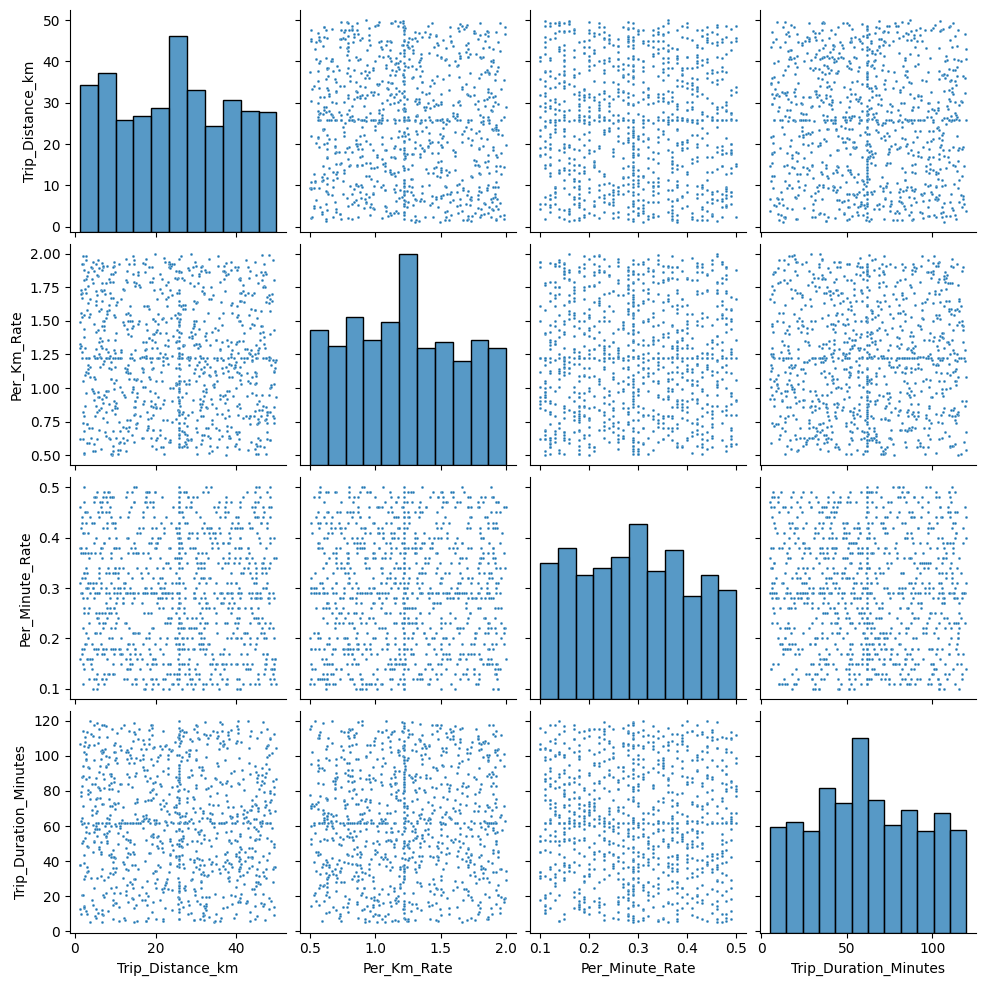

In [63]:
sns.pairplot(df[['Trip_Distance_km',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes']], plot_kws={"s": 4});

Seperti yang terlihat pada pairplot di atas, dapat disimpulkan bahwa antar fitur memiliki korelasi yang rendah. Karna itu, pengurangan dimensi tidak cocok dilakukan dengan alasan :
- Tidak ada multikolinearitas yang tinggi antar variabel
- Setiap fitur memberikan informasi yang cukup unik
- Korelasi tertinggi hanya 0.68 (Trip_Distance_km dengan Trip_Price)

## Train-Test-Split
Menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop(["Trip_Price"],axis =1)
y = df["Trip_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [65]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 975
Total # of sample in train dataset: 780
Total # of sample in test dataset: 195


## Standarisasi
Standarisasi dilakukan untuk mengubah data sehingga memiliki mean 0 dan standar deviasi 1.

In [66]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Trip_Distance_km',	'Per_Km_Rate',	'Per_Minute_Rate',	'Trip_Duration_Minutes']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
989,1.136130,1.148331,-1.143339,-0.503477
93,0.237662,1.316204,1.482278,1.493782
78,-0.468886,-0.026780,1.572817,-0.572447
491,0.443087,-0.890127,-0.962262,-1.089403
970,0.047875,1.196295,-0.962262,-0.129889


In [67]:
X_train[numerical_features].describe().round(4)

,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
count,780.0000,780.0000,780.0000,780.0000
mean,-0.0000,0.0000,0.0000,-0.0000
std,1.0006,1.0006,1.0006,1.0006
min,-1.7007,-1.7535,-1.7771,-1.8359
25%,-0.8730,-0.8482,-0.8717,-0.7992
50%,0.0479,-0.0268,-0.0569,-0.0220
75%,0.8634,0.7886,0.8485,0.8083
max,1.7652,1.8438,1.8444,1.8294


sekarang nilai mean = 0 dan standar deviasi ≈ 1.

# Model Development

Membuat tiga buah model machine learning dangan algoritma berikut:

- K-Nearest Neighbor (KNN)
- Random Forest
- Boosting Algorithm.

In [68]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## K-Nearest Neighbor (KNN)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [70]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Boosting Algorithm

In [71]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

Melakukan proses scaling pada data latih untuk menghindari kebocoran data

In [72]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

 Evaluasi ketiga model dengan metrik MSE

In [73]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.070164,0.088824
RF,0.008079,0.052477
Boosting,0.119641,0.148106


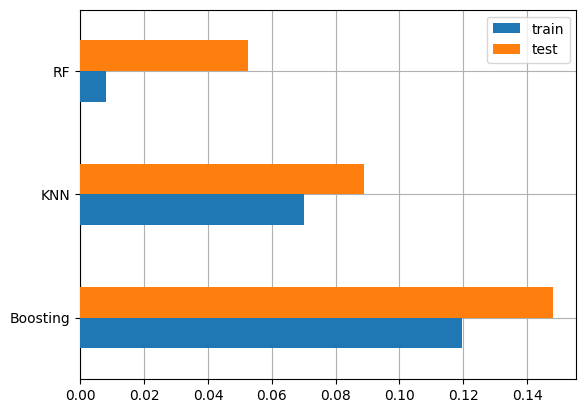

In [74]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar. Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga taxi.

Untuk mengujinya, prediksi menggunakan beberapa harga dari data test

In [75]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
902,38.9591,47.0,36.4,30.1


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati